## Group 87 Final report - Predicting Reason for Absence at Work

## Introduction

Background Information

Absenteeism refers to the habitual non-presence of an employee at their job. Absence turns into absenteeism when an employee is absent from work for lengths beyond what is considered an acceptable time span. People miss work for various reasons such as health issues, familial commitments, etc.

Employee absenteeism becomes a problem for companies as it can result in lowered productivity, increased costs, and employee burnout. If an employee is regularly absent, they contribute less to the company leading to decreased productivity. However, the company is still bearing the cost of hiring this employee, who is often eligible for paid leaves. The work that the absent employee misses has to be done by another employee, which can lead to employee burnout for the latter. 

It is because of these effects that it becomes important to study absenteeism and find solutions for the same.

Dataset Information

The dataset “Absenteeism at Work” was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. It was donated to the UCI Machine Learning Repository, which is our source for the dataset. The data consists of 740 rows and 21 columns. A total of 28 reasons for absences are documented, each represented by an integer from 1 to 28. A reason represented by 0 means “other reason”. We chose the top 10, most common reasons to be predicted since many reasons like death and blood donation are less common in the dataset.

In this project, we aim to predict the reason for absence using a classification model based on three predictors: age, BMI and absenteeism time in hours. We chose these three predictors after a lot of deliberation as they showed an interpretable correlation with the categories given in the dataset.

# Methods and Results 

So in the beginning, we load the necessary libraries. 

## Loading the necessary libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Loading data

We downloaded the absenteeism dataset from the following website and assigned a name to each column. 

In [2]:
data <- read_csv2(url("https://raw.githubusercontent.com/tim13246879/dsci-100-2022w1-group-87/main/Absenteeism_at_work.csv"))
colnames(data) <- make.names(colnames(data))
data

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (20): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239554,⋯,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239554,⋯,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40


Table 1: Original absenteeism dataset. 

## Preliminary Data Analysis 

# Wrangling data

We started to wrangle the data by removing all 0s in the "reasons for absence" column of our original dataset, as these cases might affect the data analysis process. Then, we counted how frequent were the reasons for absence. Because there were 10 reasons for absence (23, 28, 27, 13, 19, 22, 26, 25, 11, and 10) that were more frequent as indicated in top_10_reasons, we decided to filter out these 10 reasons. We converted the "reason for absence" into factors, because it was a categorical variable we wanted to predict. 

In [3]:
top_10_reasons <- data |>
    group_by(Reason.for.absence)|>
    summarize(n=n()) |>
    filter(Reason.for.absence != "0") |>
    arrange(desc(n)) |>
    slice(1:10)
top_10_reasons

Reason.for.absence,n
<dbl>,<int>
23,149
28,112
27,69
13,55
19,40
22,38
26,33
25,31
11,26


Table 2: Frequency of the top 10 reasons for absence 

In [4]:
data <- data |> 
    filter(Reason.for.absence %in% c("23","28","27","13","19","22","26","25","11","10")) |>
    mutate(across(Reason.for.absence, as.factor))
data

ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40
1,22,7,2,1,235,11,14,37,239554,⋯,0,3,1,0,0,1,88,172,29,8
20,11,7,4,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,8


Table 3: Filtered Absenteeism dataset 

This filtered dataset would be used for the rest of our data analysis. In this dataset, the reason of absence represented by 0 meaning “other reasons” were removed. Only the top 10 reasons were kept (23, 28, 27, 13, 19, 22, 26, 25, 11, and 10). The reason for absence column was mutated to factor. 

# Visualizations to determine the potential predictors to predict reason for absence 

To determine the potential predictor, we explored 4 variables (absenteeism time in hours, body mass index(BMI), age and distance from residence to work) by plotting bar graphs to check if there was a correlation between the reasons for absence and the different variables we were classifying. We will not use the mean in our final prediction. 

## Datatable and visualization for absenteeism time in hours 

From the filtered dataset, we were interested in how the mean absenteeism time (hrs) might relate to the top 10 reasons for absence. We took the average of absenteeism time (hrs) for each reason for absence and added a "reason" column in a datatable to define each reason.

In [5]:
data_mean_time <- data |> 
    group_by(Reason.for.absence)|>
    summarize(Absenteeism.time.in.hours = mean(Absenteeism.time.in.hours))|>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_time

Reason.for.absence,Absenteeism.time.in.hours,Reason
<fct>,<dbl>,<chr>
10,11.040000,Diseases of the respiratory system
11,11.423077,Diseases of the digestive system
13,15.309091,Diseases of the musculoskeletal system and connective tissue
19,18.225000,"Injury, poisoning and certain other consequences of external causes"
22,7.710526,patient follow-up
23,2.845638,medical consultation
25,3.483871,laboratory examination
26,7.272727,unjustified absence
27,2.275362,physiotherapy


Table 4: The top 10 reasons for absence and number of hours absent 

 Then we plotted a bar graph to show how many hours are absent for each reason of absence. 

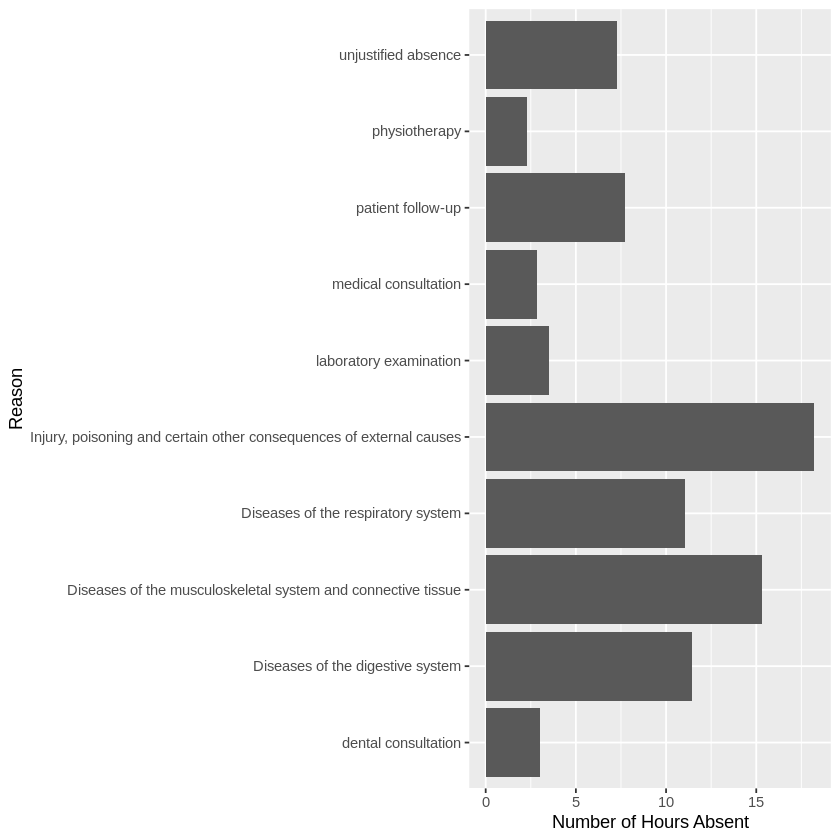

In [6]:
data_plot_time <- ggplot(data_mean_time, aes(y=Reason,x=Absenteeism.time.in.hours)) +
    geom_bar(stat = "identity", position = "dodge")+
    labs(x="Number of Hours Absent")
data_plot_time

Figure 1: Bar graph of the top reasons for absence vs. number of hours absent 

From the bar graph above, each absenteeism time (hrs) is different for each reason of absence indicated by separate length of bars, which shows a possible correlation between number of hours absent and reason of absence. For example, “injury, poisoning and other consequences” have a mean absence hours around 18 hrs. Dental consultation only has 3 hrs. So we thought this might be one of our predictors. 

## Visualizations and data table for BMI: 

From the filtered dataset, we were also interested in how the mean body mass index (BMI) might relate to the top 10 reasons for absence. We take the average of BMI for each reason for absence and add a "reason" column in a datatable. 

In [7]:
data_mean_BMI <- data |> 
    group_by(Reason.for.absence)|>
    summarize(Body.mass.index = mean(Body.mass.index)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_BMI 

Reason.for.absence,Body.mass.index,Reason
<fct>,<dbl>,<chr>
10,26.20000,Diseases of the respiratory system
11,26.42308,Diseases of the digestive system
13,26.63636,Diseases of the musculoskeletal system and connective tissue
19,26.40000,"Injury, poisoning and certain other consequences of external causes"
22,26.18421,patient follow-up
23,26.65772,medical consultation
25,25.09677,laboratory examination
26,30.18182,unjustified absence
27,27.46377,physiotherapy


Table 5: Top 10 reasons for absence vs. mean of body mass index 

Then we plotted a bar graph to show how the mean BMI is different for each reason of absence. 

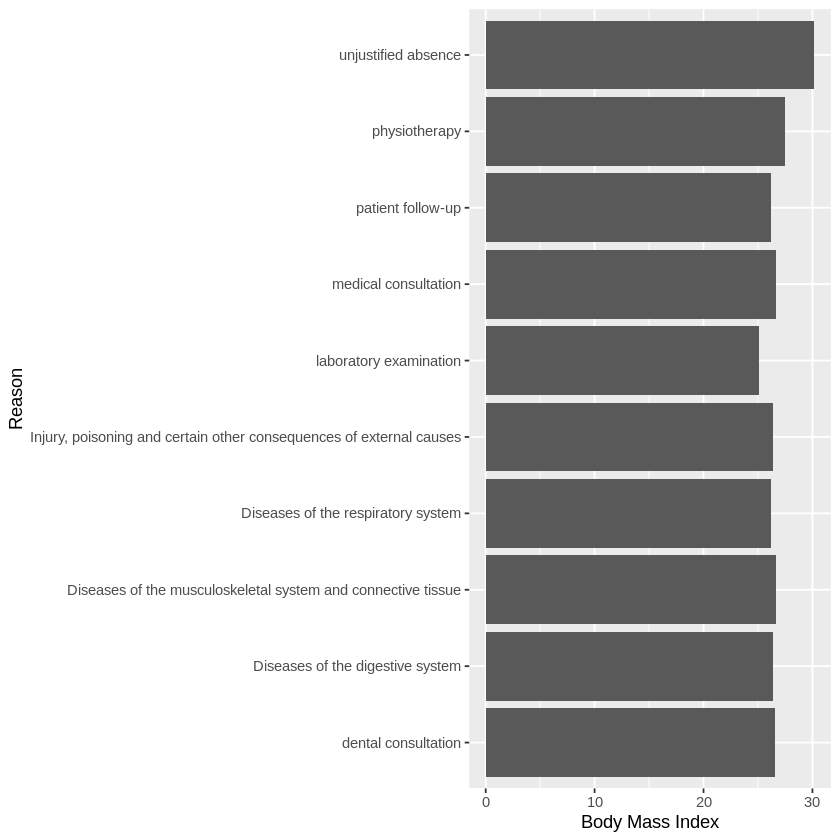

In [8]:
data_plot_BMI <- ggplot(data_mean_BMI, aes(y=Reason,x=Body.mass.index)) +
    geom_bar(stat = "identity", position = "dodge")+
    labs(x="Body Mass Index")
data_plot_BMI

Figure 2: Bar graph of mean body mass index(x-axis) vs. reason for absenteeism(y-axis)

From the bar graph above, it seems that body mass index is similar for each reason of absence indicated by the same length of the bars. Body mass index probably has no correlation to reason of absence, so it might be a bad predictor. 

## Visualizations and data table for Age: 

From the filtered dataset, we were interested in how the mean age might relate to the top 10 reasons for absence. We took the average of age for each reason for absence and added a "reason" column in a datatable. 

In [9]:
data_mean_Age <- data |>
    group_by(Reason.for.absence)|>
    summarize(Age = mean(Age)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_mean_Age


Reason.for.absence,Age,Reason
<fct>,<dbl>,<chr>
10,35.96000,Diseases of the respiratory system
11,35.11538,Diseases of the digestive system
13,36.49091,Diseases of the musculoskeletal system and connective tissue
19,35.45000,"Injury, poisoning and certain other consequences of external causes"
22,32.65789,patient follow-up
23,35.61074,medical consultation
25,36.16129,laboratory examination
26,37.84848,unjustified absence
27,35.50725,physiotherapy


Table 6: Top 10 reasons for absence vs. mean age

Then we plotted a bar graph to show how the mean age is different for each reason of absence. 

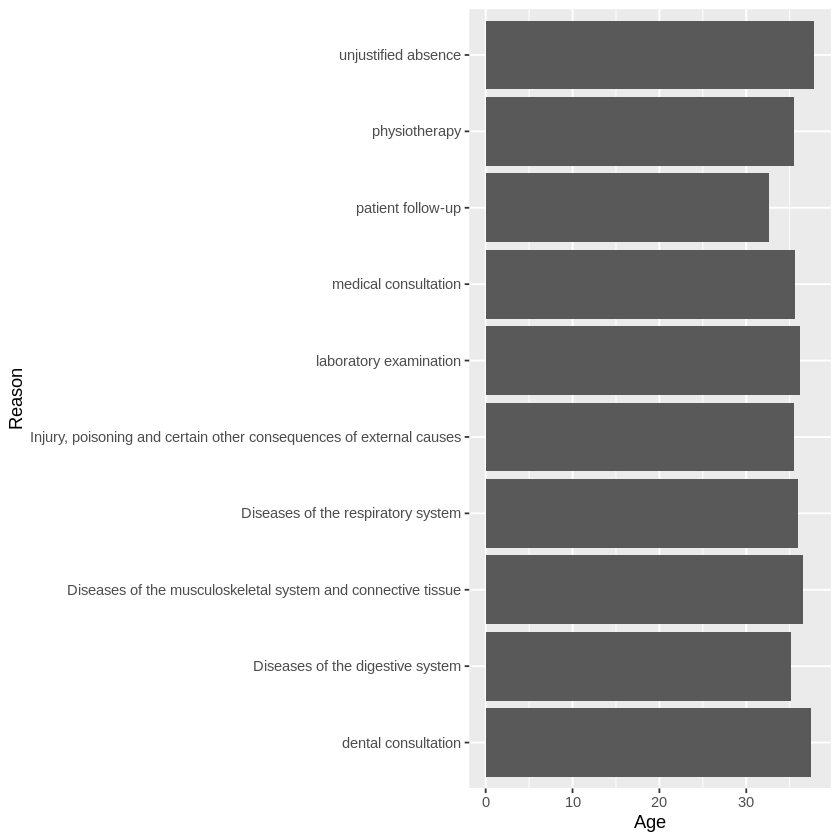

In [10]:
data_plot_Age <- ggplot(data_mean_Age, aes(y=Reason,x=Age)) +
    geom_bar(stat = "identity", position = "dodge")
data_plot_Age

Figure 3: Bar graph of age(x-axis) vs. reason for absenteeism(y-axis)

From the bar graph above, there is no variation for each reason of absence throughout different ages indicated by the same length of the bars. Age probably has no correlation to reason of absence, so it might be a bad predictor. 

## Visualizations and data table for number of children (Son): 

We were also interested in how the mean number of children(son) relate to the top 10 reasons for absence. We took the average number of children for each reason for absence and added a "reason" column in a datatable. 

In [11]:
data_mean_children <- data  |>
    group_by(Reason.for.absence)|>
    summarize(Son = mean(Son)) |>
    mutate(Son = as.integer(Son)) |> 
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation")) 
data_mean_children 

Reason.for.absence,Son,Reason
<fct>,<int>,<chr>
10,1,Diseases of the respiratory system
11,0,Diseases of the digestive system
13,0,Diseases of the musculoskeletal system and connective tissue
19,1,"Injury, poisoning and certain other consequences of external causes"
22,1,patient follow-up
23,0,medical consultation
25,1,laboratory examination
26,1,unjustified absence
27,0,physiotherapy


Table 6: Top 10 reasons for absence vs. mean number of children

Then we plotted a bar graph to show how the mean number of children is different for each reason of absence. 

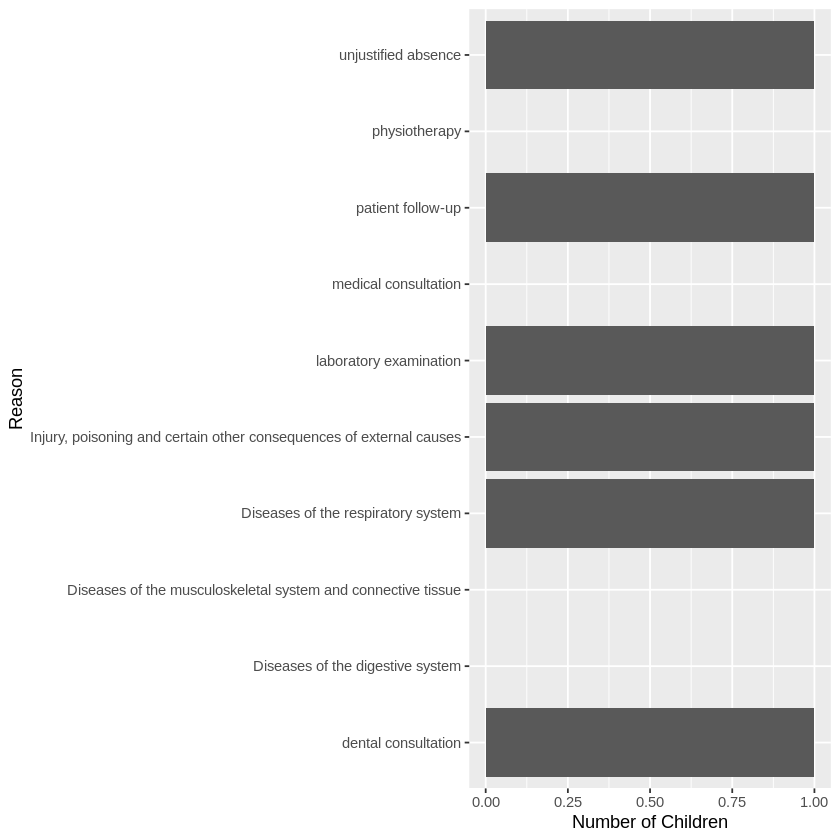

In [12]:
data_plot_children <- ggplot(data_mean_children, aes(y=Reason,x=Son)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x="Number of Children")
data_plot_children

## Visualizations and data table for distance from residence to work: 
We were also interested in how the mean distance from residence to work relate to the top 10 reasons for absence. We took the average distance for each reason for absence and added a "reason" column in a datatable.

In [13]:
data_mean_distance <- data  |>
    group_by(Reason.for.absence)|>
    summarize(Distance.from.Residence.to.Work = mean(Distance.from.Residence.to.Work)) |>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation")) 
data_mean_distance 

Reason.for.absence,Distance.from.Residence.to.Work,Reason
<fct>,<dbl>,<chr>
10,24.00000,Diseases of the respiratory system
11,29.69231,Diseases of the digestive system
13,29.52727,Diseases of the musculoskeletal system and connective tissue
19,30.42500,"Injury, poisoning and certain other consequences of external causes"
22,36.68421,patient follow-up
23,27.94631,medical consultation
25,22.67742,laboratory examination
26,25.84848,unjustified absence
27,36.98551,physiotherapy


Table 6: Top 10 reasons for absence vs. Distance from residence to work 

Then we plotted a bar graph to show how the mean number of children is different for each reason of absence.

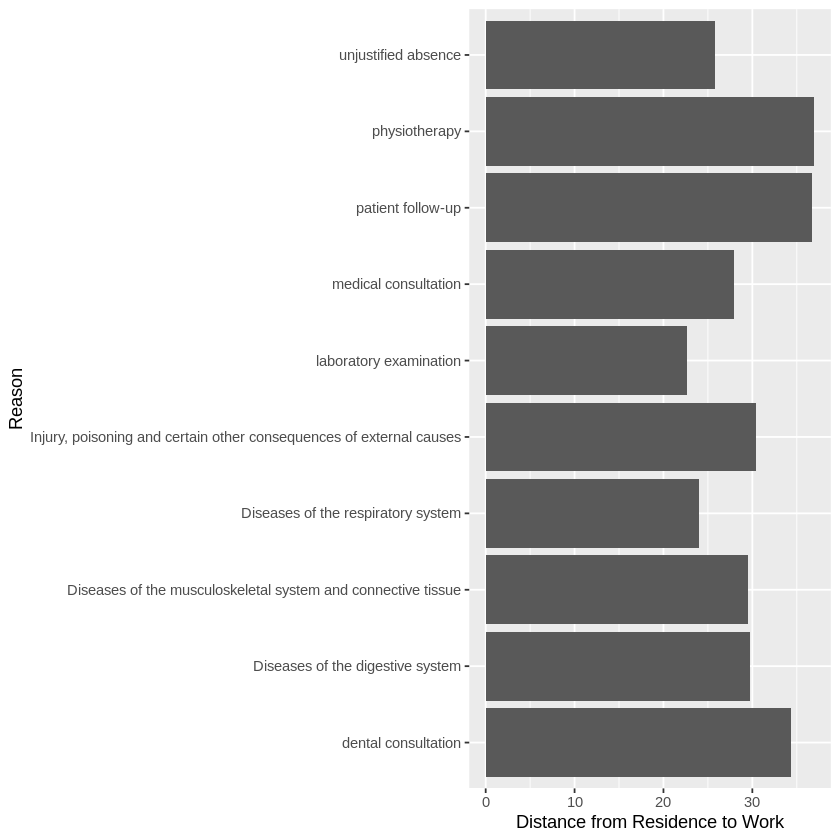

In [14]:
data_plot_distance <- ggplot(data_mean_distance, aes(y=Reason,x=Distance.from.Residence.to.Work)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x="Distance from Residence to Work")
data_plot_distance

Figure 4: Bar graph of distance from residence to work(x-axis) vs. reason for absenteeism(y-axis)

From the bar graph above, there are different distances from residence to work for each reason of absence as indicated by the separate bars, which shows a possible correlation between distances from residence to work and reason of absence. So we thought this might be one of our predictors. 

To summarize, using figure 1-4, there is a possible correlation between the  distances from residence to work or the number of hours absent, and the reason for absenteeism. Therefore, we would use the  distances from residence to work and the number of hours absent as our two predictors for the remaining data analysis.

## Data analysis - Classification 

Since we were predicting a categorical variable (reason for absence), we would perform our data analysis using a classification model using  distances from residence to work and absenteeism time(hr) as our predictor variables. 

We set our seed to 1000. We splitted the dataset into 70% training set and 30% training set. 

In [15]:
set.seed(1000) 

data_split <- initial_split(data, prop = 0.7, strata = Reason.for.absence)  
data_train <- training(data_split)
data_test <- testing(data_split)

First we created a nearest_neighbors model specification, with neighbors = tune() and a recipe that uses all predictors. Then we performed a 5-fold cross validation using the vfold_cv function to split up the training data to find the most optimal k for our dataset. 

In [16]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_tune

data_recipe <- recipe(Reason.for.absence ~ Absenteeism.time.in.hours + Distance.from.Residence.to.Work, data = data_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

data_recipe

data_vfold <- vfold_cv(data_train, v = 5, strata = Reason.for.absence)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

We then added the recipe and model specification to a workflow, and used the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values from 1 to 50. Note that k_vals is chosen to be 1 to 50 so it is less computationally expensive. We also tried k_vals of 1 to 100, but it took way too long to process. 

In [17]:
k_vals <- tibble(neighbors = seq(1:50))

knn_results <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = data_vfold, grid = k_vals) |>
    collect_metrics()

We created a plot that compares the accuracies with different k.

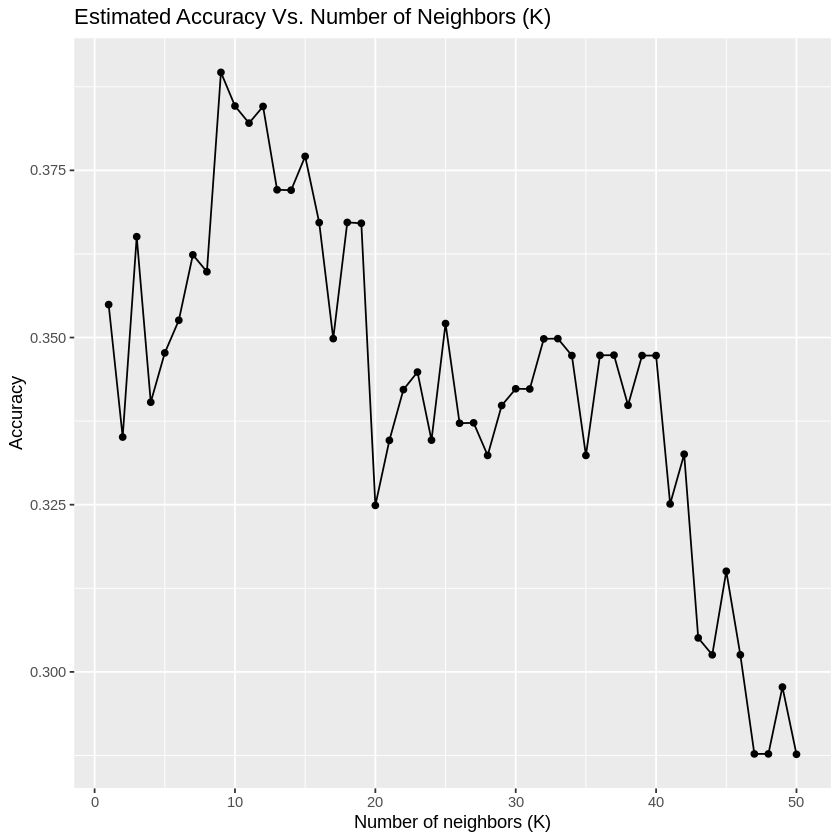

In [18]:
accuracies <- knn_results |>
    filter(.metric == "accuracy")


knn_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of neighbors (K)", y = "Accuracy", title = "Estimated Accuracy Vs. Number of Neighbors (K)")
knn_plot

Figure 5: Esimated accuracy vs. number of neighbors(k) 

From the above graph, it appears that K = 12 might be the best for the model. It has relatively high accuracy (close to 0.4) compared to other values of K. Any K value in the range between 23 and 31 have high accuracies and would work as K values, but we chose a value in the middle. We believe that the variability of K = 25 and K = 26 is just chance, and that K = 27 is the true vertex of the distribution, and the best K-value to choose. 

We then made a new model specification for the best parameter value (i.e., K = 38), and retrained the entire data set using the fit function. 

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
            set_engine("kknn") |>
            set_mode("classification")

data_fit <- workflow() |>
             add_recipe(data_recipe) |>
             add_model(knn_spec) |>
             fit(data = data_train)
data_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.560794
Best kernel: rectangular
Best k: 12

Then we evaluated and reported the estimated accuracy of the classifier based on the testing data. We also evaluated the confusion matrix. 

In [20]:
data_test_predictions <- predict(data_fit, data_test) |>
                          bind_cols(data_test) 

data_prediction_accuracy <- data_test_predictions |>
                        metrics(truth = Reason.for.absence, estimate = .pred_class)
data_prediction_accuracy

data_mat <- data_test_predictions |>
                conf_mat(truth = Reason.for.absence, estimate = .pred_class)
data_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4571429
kap,multiclass,0.3477067


          Truth
Prediction 10 11 13 19 22 23 25 26 27 28
        10  0  0  1  1  2  1  0  1  0  0
        11  0  0  0  0  0  0  0  0  0  0
        13  5  1  6 10  3  0  0  0  0  3
        19  1  0  0  2  1  0  0  2  0  0
        22  0  1  0  2  4  0  1  1  0  1
        23  0  2  3  1  0 31  4  3  7 13
        25  0  1  0  0  1  0  0  0  0  0
        26  1  0  1  1  1  0  0  1  0  0
        27  1  0  1  0  1  6  0  0 20  3
        28  0  0  0  0  0  6  0  0  0 16

Figure 6: Accuracies after classification 

The first table reports the accuracies of the prediction, which is 45.7%. The second table is the confusion matrix. As you can see, it was better at predicting some classes more than others. 

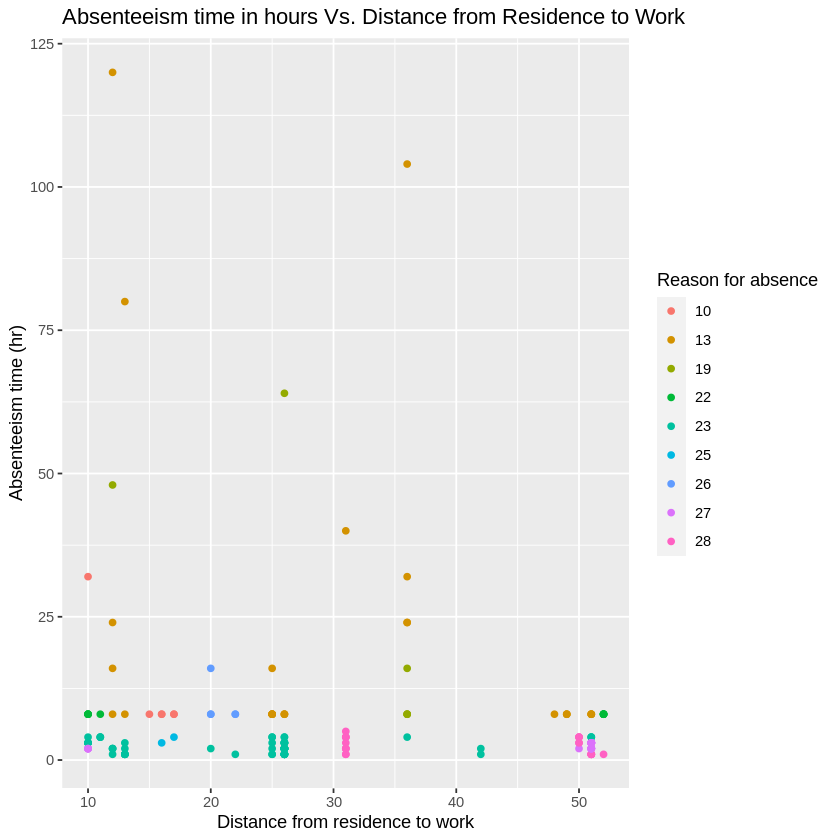

In [21]:
final_vis <- data_test_predictions |>
                ggplot(aes(x = Distance.from.Residence.to.Work,
                           y = Absenteeism.time.in.hours,
                          color = .pred_class)) +
                geom_point() +
                labs(x = "Distance from residence to work", 
                     y = "Absenteeism time (hr)", 
                     title = "Absenteeism time in hours Vs. Distance from Residence to Work",
                    color = "Reason for absence")
final_vis

## Discussion 

### What we find: 
### discuss whether this is what you expected to find?
### discuss what impact could such findings have?
- Such finding could help employers understand the reasons for their employee's absence at work, assisting them in planning and hiring processes

### discuss what future questions could this lead to?
- If such classifier is accurate, one question that could be asked is how and why each predictor is related to the reason of absence. And whether this classifier can be used on a wider population (in Brazil, or in other places of the world).

# Reference 

Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.